NameError: name 'data' is not defined

In [198]:
data.describe()


,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100514.000000,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,0.779881,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,0.426492,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,0.000000,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.000000,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,1.000000,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,1.000000,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,2.000000,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


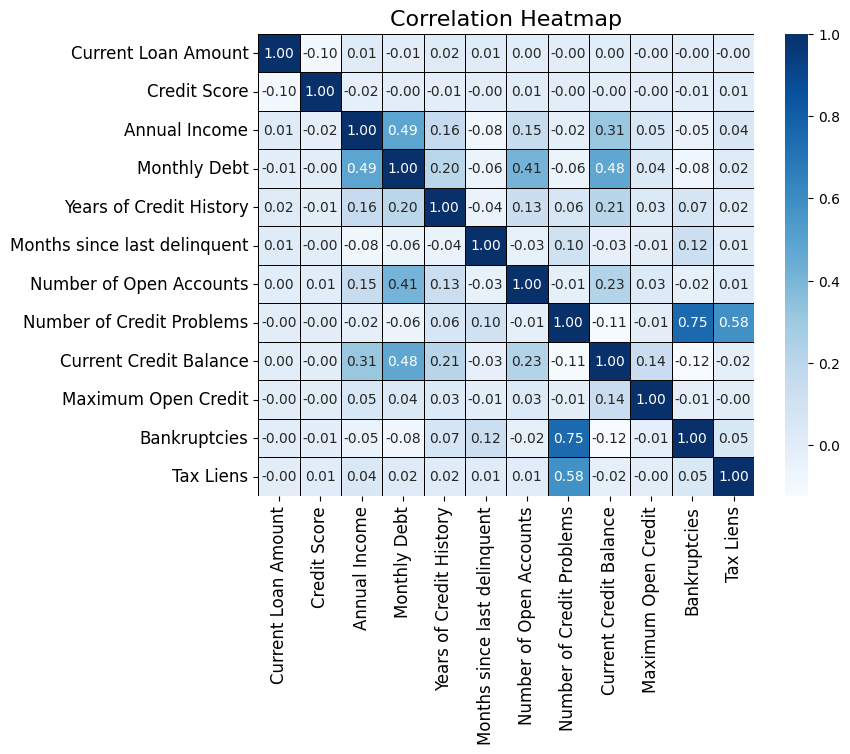

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the numerical columns for correlation
numerical_features = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 
                      'Years of Credit History', 'Months since last delinquent', 
                      'Number of Open Accounts', 'Number of Credit Problems', 
                      'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']

# Correlation matrix
corr_matrix = data[numerical_features].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


C:\Users\Nidhithashree k\AppData\Local\Temp\ipykernel_25392\3865105568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan Status', y='Annual Income', data=data, palette='Blues')


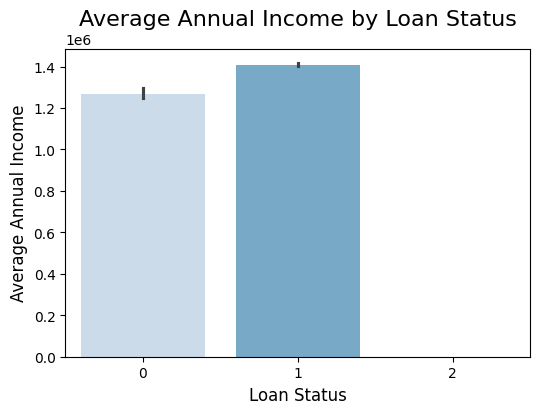

In [214]:
# Average Annual Income vs Loan Status
plt.figure(figsize=(6, 4))
sns.barplot(x='Loan Status', y='Annual Income', data=data, palette='Blues')
plt.title('Average Annual Income by Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Average Annual Income', fontsize=12)
plt.show()


C:\Users\Nidhithashree k\AppData\Local\Temp\ipykernel_25392\1966059843.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan Status', y='Monthly Debt', data=data, palette='Blues')


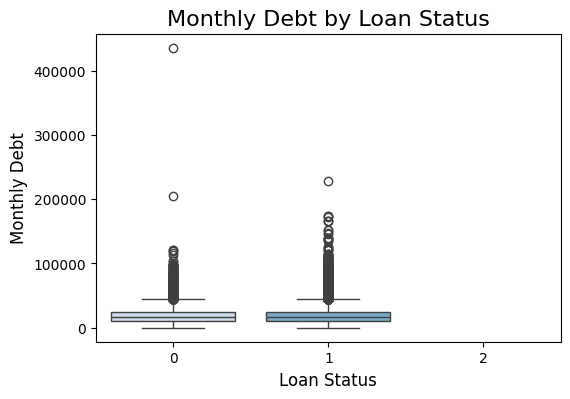

In [212]:
# Monthly Debt vs Loan Status (Boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Loan Status', y='Monthly Debt', data=data, palette='Blues')
plt.title('Monthly Debt by Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Monthly Debt', fontsize=12)
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, ClassifierMixin


In [3]:
# Load Dataset
data = pd.read_csv("loan_data.csv")  


In [5]:
data.describe()


,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [7]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [9]:
data.drop_duplicates(inplace=True)

In [11]:
# Handle invalid or inconsistent values
data['Home Ownership'] = data['Home Ownership'].replace(['NONE', 'ANY'], 'Unknown')
data['Purpose'] = data['Purpose'].str.strip()

# Convert numeric columns to proper types to handle invalid values
data['Term'] = pd.to_numeric(data['Term'], errors='coerce')
data['Credit Score'] = pd.to_numeric(data['Credit Score'], errors='coerce')
data['Annual Income'] = pd.to_numeric(data['Annual Income'], errors='coerce')
data['Monthly Debt'] = pd.to_numeric(data['Monthly Debt'], errors='coerce')
data['Years of Credit History'] = pd.to_numeric(data['Years of Credit History'], errors='coerce')
data['Number of Open Accounts'] = pd.to_numeric(data['Number of Open Accounts'], errors='coerce')
data['Current Credit Balance'] = pd.to_numeric(data['Current Credit Balance'], errors='coerce')
data['Maximum Open Credit'] = pd.to_numeric(data['Maximum Open Credit'], errors='coerce')

# Fill missing values
data.fillna({
    'Term': data['Term'].mean(),
    'Credit Score': data['Credit Score'].median(),
    'Annual Income': data['Annual Income'].median(),
    'Years in current job': 'Unknown',  # Keep as string category
    'Home Ownership': 'Unknown',
    'Purpose': 'Unknown',
    'Monthly Debt': data['Monthly Debt'].median(),
    'Years of Credit History': data['Years of Credit History'].median(),
    'Months since last delinquent': 0,
    'Number of Open Accounts': data['Number of Open Accounts'].median(),
    'Number of Credit Problems': 0,
    'Current Credit Balance': data['Current Credit Balance'].median(),
    'Maximum Open Credit': data['Maximum Open Credit'].median(),
    'Bankruptcies': 0,
    'Tax Liens': 0
}, inplace=True)


In [13]:
# Remove outliers using IQR method
numeric_cols = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 
                'Years of Credit History', 'Current Credit Balance', 'Maximum Open Credit']
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Encode categorical variables
categorical_cols = ['Home Ownership', 'Purpose', 'Years in current job']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature Scaling
scaler = StandardScaler()
scaled_cols = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History',
               'Current Credit Balance', 'Maximum Open Credit']
data[scaled_cols] = scaler.fit_transform(data[scaled_cols])

# Define features and target
X = data.drop(['Loan ID', 'Customer ID', 'Loan Status'], axis=1)
y = data['Loan Status']
y = LabelEncoder().fit_transform(y)  # Encode 'Loan Status' as 0 (No) or 1 (Yes)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Custom Ensemble Model using RandomForestClassifier
class CustomEnsembleModel(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.models = [
            RandomForestClassifier(random_state=42),
            RandomForestClassifier(random_state=43)
        ]

    def fit(self, X, y):
        subsets = np.array_split(X.columns, len(self.models))
        self.subsets = subsets
        for model, subset in zip(self.models, subsets):
            model.fit(X[subset], y)
        return self

    def predict(self, X):
        predictions = []
        for model, subset in zip(self.models, self.subsets):
            predictions.append(model.predict(X[subset]))
        return np.round(np.mean(predictions, axis=0)).astype(int)

# Train the Custom Ensemble Model
ensemble_model = CustomEnsembleModel()
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Accuracy Calculation
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

print("Custom Ensemble Model Accuracy:", ensemble_accuracy)

# Classification Report
print("Classification Report (Custom Ensemble Model):")
print(classification_report(y_test, y_pred_ensemble))

# Predicting for a new applicant
def preprocess_applicant_data(applicant_data, label_encoders, scaler, categorical_cols, scaled_cols):
    # Convert applicant data into a DataFrame
    applicant_df = pd.DataFrame([applicant_data])

    # Handle unseen categories for categorical columns
    for col in categorical_cols:
        if applicant_df[col].iloc[0] not in label_encoders[col].classes_:
            # Add the unseen value to encoder classes
            label_encoders[col].classes_ = np.append(label_encoders[col].classes_, applicant_df[col].iloc[0])
        applicant_df[col] = label_encoders[col].transform(applicant_df[col])

    # Scale numeric features
    applicant_df[scaled_cols] = scaler.transform(applicant_df[scaled_cols])

    return applicant_df

def predict_loan_eligibility_ensemble(applicant_data):
    applicant_df = preprocess_applicant_data(applicant_data, label_encoders, scaler, categorical_cols, scaled_cols)
    prediction = ensemble_model.predict(applicant_df)
    return "Yes" if prediction[0] == 1 else "No"

# Example Applicant Data
new_applicant = {
    'Current Loan Amount': 50000,
    'Term': 360,
    'Credit Score': 750,
    'Annual Income': 80000,
    'Years in current job': '5 years',  # Categorical feature as string
    'Home Ownership': 'Mortgage',  # Categorical feature
    'Purpose': 'Debt Consolidation',  # Categorical feature
    'Monthly Debt': 1000,
    'Years of Credit History': 10,
    'Months since last delinquent': 24,
    'Number of Open Accounts': 5,
    'Number of Credit Problems': 0,
    'Current Credit Balance': 20000,
    'Maximum Open Credit': 50000,
    'Bankruptcies': 0,
    'Tax Liens': 0
}

# Predict eligibility
eligibility_ensemble = predict_loan_eligibility_ensemble(new_applicant)
print("Loan Eligibility (Custom Ensemble Model):", eligibility_ensemble)


Custom Ensemble Model Accuracy: 0.7171273813970863
Classification Report (Custom Ensemble Model):
              precision    recall  f1-score   support

           0       0.31      0.09      0.14      2712
           1       0.75      0.93      0.83      7996

    accuracy                           0.72     10708
   macro avg       0.53      0.51      0.49     10708
weighted avg       0.64      0.72      0.66     10708

Loan Eligibility (Custom Ensemble Model): Yes
